In [78]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import *




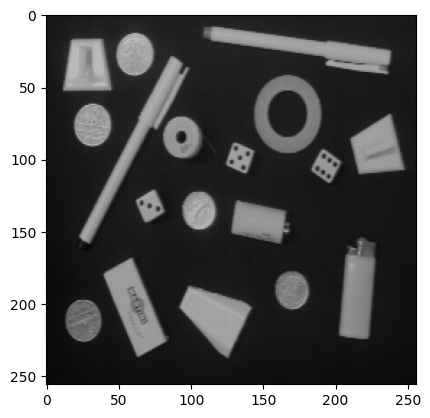

In [79]:
img = plt.imread('./Imagenes/objects.png')
plt.imshow(img)

def show2imgs(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    plt.show()


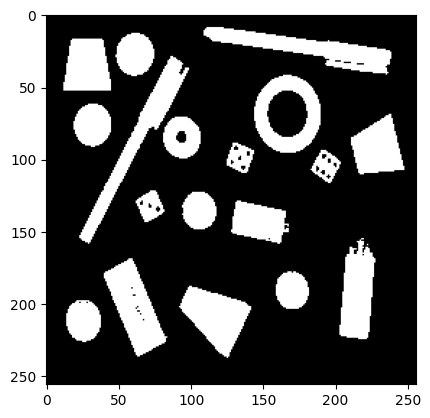

In [80]:
img_gray = ski.color.rgb2gray(rgba2rgb(img)) 
thresh = ski.filters.threshold_otsu(img_gray)
binary = img_gray > thresh

plt.imshow(binary, cmap='gray')

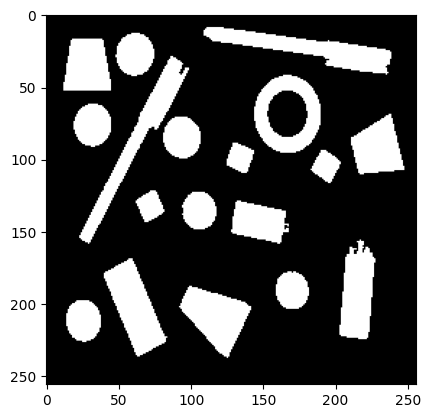

In [81]:
cleaned = ski.morphology.remove_small_objects(binary.astype(bool), min_size=100)
cleaned = ski.morphology.remove_small_holes(cleaned, area_threshold=100)
plt.imshow(cleaned, cmap='gray')

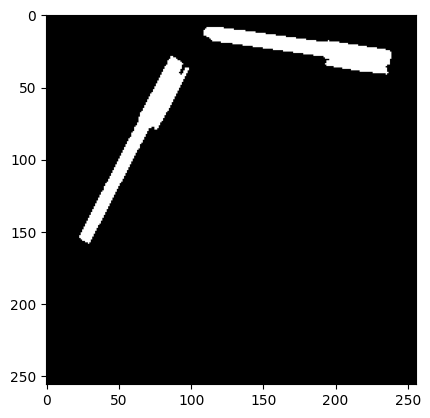

In [82]:
labeled = ski.measure.label(cleaned)
props = ski.measure.regionprops(labeled)

pen_mask = np.zeros_like(binary)
for prop in props:
    if prop.area > 1000 and prop.eccentricity > 0.99:  # Ajustar estos valores
        pen_mask[prop.coords[:, 0], prop.coords[:, 1]] = 1

plt.imshow(pen_mask, cmap='gray')





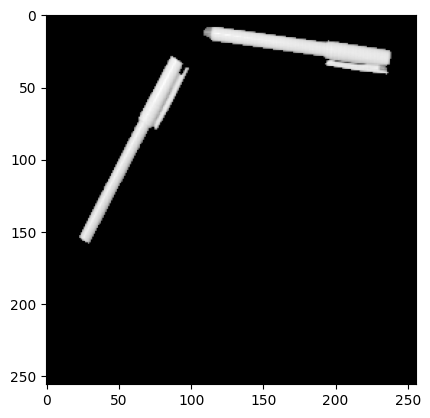

In [83]:

result = img_gray * pen_mask
plt.imshow(result, cmap='gray')

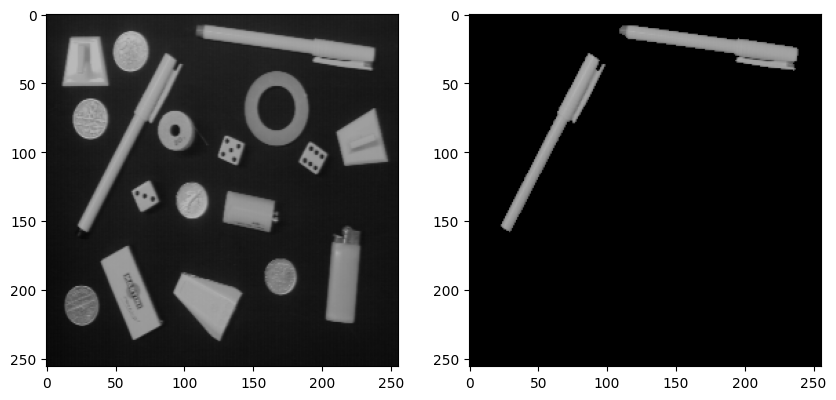

In [84]:
num_channels = img.shape[2]

# Aplicar la máscara y forzar fondo negro si es necesario
resultado = img.copy()
resultado[:, :, :num_channels] = np.multiply(img[:, :, :num_channels], np.dstack([pen_mask]))
resultado[:, :, 3] = 1 #Alpa a 1 es negro

# Mostrar el resultado

show2imgs(img,resultado)